

# <center>  Coleta de dados no Twitter  
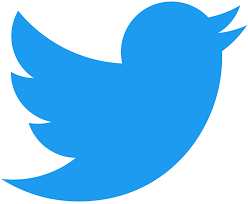
***
Neste exemplo prático vamos realizar uma coleta de dados simples utilizando a API do twitter. 
    
    
Requisitos para realizar essa tarefa:

- Possuir uma conta no twitter
- Realizar o cadastro como desenvolvedor no link: https://developer.twitter.com/en
 - Veja o passo a passo em: https://github.com/ProfLeandroLessa/twitter_data_colect/tree/master/manual

***


### Instalando bibliotecas

Para essa atividade vamos utilizar as bibliotecas tweepy, pandas e python-dotenv

In [ ]:
!pip install tweepy # biblioteca para acessar dados do twitter
!pip install pandas # biblioteca para manipulação de dataframes

### Documentação da biblioteca Tweepy
https://docs.tweepy.org/en/latest/getting_started.html

### Instalando biblioteca para trabalhar com variáveis de ambientes
>!pip install python-dotenv

### Variáveis de ambiente
***
Como o próprio nome diz, são variáveis utilizadas no ambiente na qual a aplicação (programa/script) esta sendo executada. 
Uma variável de ambiente possui uma serie de informações que estão estruturadas de forma de um dicionário. No qual temos uma chave e um valor. 

As variáveis de embientes podem ser utilizadas de varias maneiras. No entanto, é muito utilizada para armazenar chaves e senhas. Embora existam outros métodos mais elaborados. 

Vamos utilizar esse tipo de variável para encapsular os usuários e senhas da nossa aplicação. Desta forma, no lugar de deixar as usuários e senhas expostas no nosso código, vamos busca-las das variáveis de ambientes. 

Na prática, vamos possuir um arquivo de texto com a extensão .env no qual teremos todas as informações que estamos armazenando.

Exemplo de um arquivo de .env

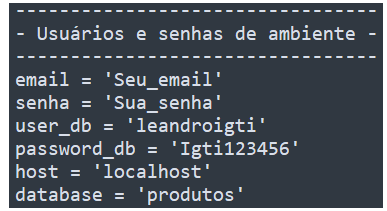

## Importando as bibliotecas 

In [1]:
import tweepy as tw
import pandas as pd
import os #Bibloteca utilizada para navegar em arquivos do Sistema operacional
from dotenv import load_dotenv #Biblioteca que realiza o acesso ao arquivo .env do diretório
load_dotenv() #Atualiza o arquivo do .env

True

### Verificando versão das bibliotecas instaladas

Abaixo segue as versões das bibliotecas utilizadas no projeto.

In [2]:
print(f'Versão da biblioteca do tweepy: {tw.__version__}')
print(f'Versão da biblioteca do pandas: {pd.__version__}')

Versão da biblioteca do tweepy: 3.10.0
Versão da biblioteca do pandas: 1.2.1


## Chaves de acesso fornecidas pelo Twitter

Abaixo segue um exemplo das chaves de acesso fornecidas pelo Twitter no momento da liberação da conta de desenvolvedor.

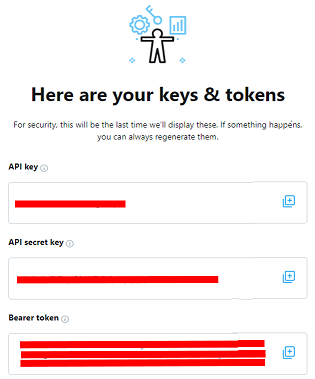

# Criandro e acessando arquivo .env 

Vamos copiar as chaves de acesso fornecidas pelo twiter e salvar em um arquivo do tipo env. Para isso, basta criar um documento do tipo txt e copiar as chaves e salvar o aquivo com o nome .env. PS: Esse arquivo vamos salvar no diretório do projeto da coleta do Twitter. 

A ideia é criar uma estrutura de chaves e valor no aquivo e depois criar um código em python para acessa-las e, em seguida, adicionar o valor das chaves em variáveis locais. Dessa forma, para cada chave do arquivo .env será uma referência das chaves disponibilizadas do Twitter.

Abaixo contém um exemplo de como o conteúdo do arquivo deverá ser criado.

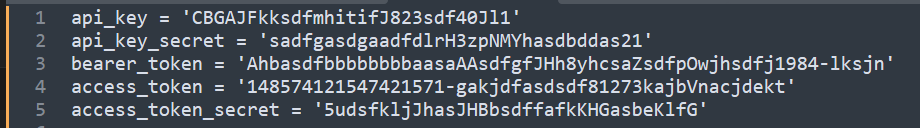


### Acessando variáveis do arquivo .env

Abaixo ilustramos a forma de como acessar o conteúdo das chaves contidos dentro do arquivo .env

In [3]:
print(os.environ['senha'])

Sua_senha


In [4]:
usuario_login = os.environ['user_db']
usuario_login # Exibindo conteúdo da variável

'leandroigti'

### Coletando dados do arquivo .env e atribuindo as váriaveis

Nesse passo, estamos coletando os dados contidos nas chaves do arquivo .env e atribuindo as variáveis que serão utilzadas para autentificação da API.


In [5]:
consumer_key = os.environ['api_key']
consumer_secret = os.environ['api_key_secret']
token = os.environ['bearer_token']
access_token = os.environ['access_token'] 
access_token_secret = os.environ['access_token_secret'] 

## Realizando autentificação na API do Twitter

In [6]:
try:
    auth = tw.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tw.API(auth) # Cria a conexão de acesso com o twitter
    api.home_timeline() # coleta todos os primeiros twittes da timeline
except  Exception as e:
    print(f'Não foi possível realizar a conexão: ERRO: {e}')


## Coletando tweets da timeline do usuário

In [8]:
public_tweets = api.home_timeline() # Pega todos os primeiros twittes da timeline

## Visualizando os tweets  públicos da timeline de forma estruturada

In [9]:
for tweet in public_tweets: # mostra os principais tweets da time line
    print(tweet.text)

Going to ODSC West 2022, either virtually or in person? Here are some networking meetups and extra events that you… https://t.co/aHdLRdCijv
Check out our video of the week page for free access to a new expert-led talk on a cutting-edge or essential… https://t.co/MiGcL03NZ9
Join our FREE #ODSCWebinar to learn how to build a basic weakly supervised system for an NLP task and then augment… https://t.co/zMaUVKtSEx
Don't sleep on SQL for data science - given its flexibility, ease of use, and timeless nature, it's going to stay i… https://t.co/qz7rPq1nuB
For #datascientists, there's no shortage of obstacles so find one you can tackle now with the time &amp; resources avai… https://t.co/B1SgoAtx6j
The AI has eyes. Researchers have taken inspiration from human eyes to create a device that captures visual informa… https://t.co/xXpcbxETK2
Join us at #ODSCAPAC Virtual this September for 15+ expert-led talks on #MachineLearning, Deep Learning, #NLP, and… https://t.co/tuEk6Ekzyh
In a recent paper f

##  Extraindo tweets baseado em um tema

Para buscar os tweets vamos utilizar a função cursor da biblioteca tweepy.

Para saber como utilizar essa função podemos abrir a documentação da biblioteca. https://docs.tweepy.org/en/v3.5.0/cursor_tutorial.html



In [10]:
#Cria string com a palavra que será pesquisada nos tweets
busca_palavras = 'analista de dados' 

# busca todos os tweets relacionado a(s) palavra(s) procuradas
tweets = tw.Cursor(api.search, # metodo da API para busrcar tweets
            q=busca_palavras).items(50) # especifica o número de tweets retornados

### Visualizando alguns atributos de um tweet

In [11]:
#Para cada tweet na lista de tweets, imprima o nome do usuário e o texto postado
for tweet in tweets:
    print(tweet.user.name, tweet.text) # traz o texto contidos nos tweets

singela RT @paralelebipede: analista de dados eh tipo sim esse dado tem seis faces. proximo
enola gomes💃🏻 RT @paralelebipede: analista de dados eh tipo sim esse dado tem seis faces. proximo
G RT @paralelebipede: analista de dados eh tipo sim esse dado tem seis faces. proximo
Jolyne kinnie ꒰ఎ🦋໒꒱ RT @paralelebipede: analista de dados eh tipo sim esse dado tem seis faces. proximo
eduarda RT @paralelebipede: analista de dados eh tipo sim esse dado tem seis faces. proximo
EDSON RENATO RT @Anna_Lupereira: @UOLNoticias Na falta de DADOS E FATOS DE ANALISTA POLÍTICO E DE PESQUISA SÉRIA DE OPINIÃO c/Bolsonaro se mexendo p/cim…
griton RT @paralelebipede: analista de dados eh tipo sim esse dado tem seis faces. proximo
Anna 🚩fé na vida é resistir @UOLNoticias Na falta de DADOS E FATOS DE ANALISTA POLÍTICO E DE PESQUISA SÉRIA DE OPINIÃO c/Bolsonaro se mexendo p… https://t.co/RWG7EYDa4q
I am I am I am RT @paralelebipede: analista de dados eh tipo sim esse dado tem seis faces. proximo
Bianca Muniz RT

## Verificando atributos de um  tweet

O formato que a API do Twitter retorna é um arquivo no formato JSON. Esse arquivo consiste em uma estrutura de chave e valor.
Veja abaixo a estrutura com vários atributos que um único tweet pode ter.

In [12]:
tweet._json

{'created_at': 'Tue Aug 02 12:39:47 +0000 2022',
 'id': 1554446865881567238,
 'id_str': '1554446865881567238',
 'text': 'A produção industrial recuou 0,4% na passagem de maio para junho, após quatro meses consecutivos de alta, informou… https://t.co/BibFYHi92P',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/BibFYHi92P',
    'expanded_url': 'https://twitter.com/i/web/status/1554446865881567238',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [116, 139]}]},
 'metadata': {'iso_language_code': 'pt', 'result_type': 'recent'},
 'source': '<a href="http://grabyo.com" rel="nofollow">Grabyo</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1181629051309572096,
  'id_str': '1181629051309572096',
  'name': 'CNN Brasil Business',
  'screen_name': 'CNNBrBusiness',
  'lo

## Visualizando tweets coletados

Como pode ver acima, cada tweet possui vários atributos que podem ser utilizados para identificação e apresentação de um conteúdo. Abaixo segue alguns atributos que utilizaremos para realização da coleta de dados.

**Atritutos:**
    
    1.  created_at: Data da publicação do tweet
    2.  name: Contém o nome da usuário que postou o tweet
    3.  description: Contém a descrição do usuário do tweet
    4.  location: Localização no qual foi postado o tweet
    5.  text - Conteúdo postado do tweet
    

## Explorandos outros atributos de um tweet

In [13]:
# Para facilitar a visualização
vars(tweet).keys() #retornar todas as chaves dentro de tweets

dict_keys(['_api', '_json', 'created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'source_url', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'author', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

### Veririando as chaves que estão dentro atributo user

In [14]:
vars(tweet.user).keys() #retorna todas as chaves dentro do atributo user

dict_keys(['_api', '_json', 'id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type', 'withheld_in_countries'])

### Visualizando nome, localização e quantidade de seguidores de um usuário do tweet

In [15]:
print(tweet.user.name,'----',tweet.user.location, tweet.user.followers_count)

CNN Brasil Business ---- São Paulo 141629


## Excluindo tweets repetidos

Para excluir os tweets repetidos, vamos adicionar na string de busca o comando **"-filter:retweets"** para informar que não queremos informações de retweets

In [16]:
busca_palavras = "#vacina" + "-filter:retweets" #Cria uma variável} que é atribuida as palavras que queremos extrair

# busca todos os tweets relacionado a(s) palavra(s) procuradas
tweets = tw.Cursor(api.search, # metodo da API para busrcar tweets
            q=busca_palavras).items(50) # especifica o número de tweets retornados

### Visualizando tweet de forma estruturada

In [17]:
for tweet in tweets:
    print( tweet.created_at, '\n',  tweet.user.name, '\n', tweet.text, '\n') # traz o texto contidos nos tweets

2022-08-02 23:43:53 
 Luisa Diele-Viegas 🦎 ⭐️ 
 Eu: 2,5 anos de pandemia sem pegar COVID e mantendo a ⭐️ da OMS intacta (até onde eu sei) ✅
4/4 doses da #vacina 💉✅… https://t.co/peCf7LzCsa 

2022-08-02 22:01:49 
 Sobre Tudo 
 🚨 Mais de 15 mil doses da vacina contra a COVID-19 perderão a validade hoje na cidade do Rio de janeiro, prefeitura… https://t.co/8mwqOJu6Iq 

2022-08-02 21:50:20 
 Grupo do bem estar 
 #Brasil tem mais de 1.500 casos confirmados de #VaríoladosMacacos ou #MonkeyPox.A Maioria em SP. Grupo mais afetado… https://t.co/PQWHDuJ1RX 

2022-08-02 21:02:56 
 Jornal de Alagoas 
 Maceió começa a vacinar crianças de 4 anos contra a Covid-19

https://t.co/OdDxNqNCnA

#maceió #vacina #crianças… https://t.co/4vS0dxTF3Y 

2022-08-02 19:27:14 
 Rafael Rossi 
 #Mirassol #regiao #Noticias #COVID  #Covid19 #COVID19pt #COVID19br  #PortalDaCidade #jornalismo #vacina #vacinação… https://t.co/i6jYxuMRgH 

2022-08-02 19:18:39 
 raffys 
 Segunda dose de reforço check 

#Vacina 

2022-08-02 

### Observação Importante

O cursor é um método dinâmico. Dessa forma, todas as vezes que o método é executado novos resultados são retornados.
Isso acontece porque os tweets são postados em tempo real.

O próximo passo é criar uma estrututa de armazenamento para salvar os tweets que estamos coletando.


## Criando lista de armazenamento
Vamos criar uma lista vazia para adicionar os dados coletados de os tweets.

In [18]:
busca_palavras = "#vacina" + "-filter:retweets" #Cria uma variável que é atribuida as palavras que queremos extrair

# busca todos os tweets relacionado a(s) palavra(s) procuradas
tweets = tw.Cursor(api.search, # metodo da API para busrcar tweets
            q=busca_palavras).items(100) # especifica o número de tweets retornados

In [19]:
# Para cada tweet em tweets, vamos coletar as informações dos atributos que queremos armazenar.
lista_tweets = []
for tweet in tweets:
    dados_tweet = []
    dados_tweet.append(tweet.created_at) 
    dados_tweet.append(tweet.user.name) 
    dados_tweet.append(tweet.user.description) 
    dados_tweet.append(tweet.user.location)
    dados_tweet.append(tweet.text)
    
    lista_tweets.append(dados_tweet)

### Verificando a lista de tweets coletados

In [21]:
lista_tweets[:10]

[[datetime.datetime(2022, 8, 2, 23, 43, 53),
  'Luisa Diele-Viegas 🦎 ⭐️',
  'PhD in Ecology and Evolution. Scientist. Herpetologist. Feminist. Activist. Vegan. Anti-racism. Anti-fascist. LGBTQIA+. Crossfiter. she/her ♀️🦎🌎💪✊🏳️\u200d🌈',
  '',
  'Eu: 2,5 anos de pandemia sem pegar COVID e mantendo a ⭐️ da OMS intacta (até onde eu sei) ✅\n4/4 doses da #vacina 💉✅… https://t.co/peCf7LzCsa'],
 [datetime.datetime(2022, 8, 2, 22, 1, 49),
  'Sobre Tudo',
  'Notícias sobre tudo do Brasil e do mundo, fiquem ligados!!',
  '',
  '🚨 Mais de 15 mil doses da vacina contra a COVID-19 perderão a validade hoje na cidade do Rio de janeiro, prefeitura… https://t.co/8mwqOJu6Iq'],
 [datetime.datetime(2022, 8, 2, 21, 50, 20),
  'Grupo do bem estar',
  'Pessoas que se encontram para colocar a ARTE, A CIÊNCIA HUMANISTA, o PROTAGONISMO CIDADÃO e a ESPIRITUALIDADE a serviço do BEM ESTAR e da FELICIDADE.',
  'São Paulo, BRASIL',
  '#Brasil tem mais de 1.500 casos confirmados de #VaríoladosMacacos ou #MonkeyPox.A Ma

## Criando um dataframe para armazenar os tweets coletados

O próximo passo é criar um dataframe que será utilizado para armezenar todo o conteúdo coletado dos tweets.

In [22]:
df_tweets= pd.DataFrame(lista_tweets, columns=['data', 'nome', 'descricao', 'localidade', 'post'])

### Visualizando tweets de forma estruturada em um dataframe

In [23]:
df_tweets

,data,nome,descricao,localidade,post
0,2022-08-02 23:43:53,Luisa Diele-Viegas 🦎 ⭐️,PhD in Ecology and Evolution. Scientist. Herpe...,,"Eu: 2,5 anos de pandemia sem pegar COVID e man..."
1,2022-08-02 22:01:49,Sobre Tudo,"Notícias sobre tudo do Brasil e do mundo, fiqu...",,🚨 Mais de 15 mil doses da vacina contra a COVI...
2,2022-08-02 21:50:20,Grupo do bem estar,"Pessoas que se encontram para colocar a ARTE, ...","São Paulo, BRASIL",#Brasil tem mais de 1.500 casos confirmados de...
3,2022-08-02 21:02:56,Jornal de Alagoas,Melhor site de notícias de Alagoas. Sempre atu...,"Alagoas, Brasil",Maceió começa a vacinar crianças de 4 anos con...
4,2022-08-02 19:27:14,Rafael Rossi,"Jornalista Esportivo (Sports Journalist), Apre...",Cedral (SP-Brasil),#Mirassol #regiao #Noticias #COVID #Covid19 #...
...,...,...,...,...,...
95,2022-07-29 17:14:21,Rafael Aloisio Freitas,"Vereador no município do RJ, 1° Secretário da ...","Rio de Janeiro, Brasil",👀👉Fique atento ao calendário de vacinação cont...
96,2022-07-29 16:32:26,ianthomaz 🏳️‍🌈,TOC - TAMANHA OVERDOSE DE CAOS,"40.755313,-73.969521",Relato importante! Triste como foi preciso pas...
97,2022-07-29 16:21:57,Quiropraxia Zona Norte SP ☯,☯ Freguesia do Ó ZN.SP - Quiropraxia. Cuida da...,São Paulo SP,#novidades #g1 #saúde #vacina #TVCultura ...
98,2022-07-29 15:38:19,Vinícius Borges ❤️‍🩹🏳️‍🌈,Médico infectologista que se dedica ao estudo ...,"São Paulo, Brasil",Brasil registrou a primeira morte por complica...


# Armazenando os tweets coletados

Existem diversas maneiras de armazenar os dados coletados do Twitter. E uma delas é criar um arquivo do tipo texto. Abaixo segue um exemplo que gera um arquivo do tipo CSV.

In [24]:
df_tweets.to_csv('tweets_coletados.csv', sep=';', encoding='utf8')

Pronto! Coleta de dados realizada com sucesso! 